![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### importing libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
import re

#classification 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# Step 7 - Classification II
    a) Importing Data
  

## a) Importing data

In [3]:
#import corpus_data_w_outliers.csv file
corpus_df_w_outliers = pd.read_csv("corpus_data_w_outliers.csv")

corpus_df_w_outliers.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df_w_outliers.shape)
corpus_df_w_outliers.head()

(149562, 1)


,blurb
0,true biography historical figure writer alcoho...
1,graphic novel two magical lady love
2,publishing magazine focus folklore occult para...
3,educating community self sufficiency building ...
4,rewarding thing event attend


In [4]:
#import cleaned2_df_w_outliers.csv file
cleaned2_df_w_outliers = pd.read_csv("cleaned2_data_w_outliers.csv")

cleaned2_df_w_outliers.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df_w_outliers.shape)
cleaned2_df_w_outliers.head(1)

(149562, 22)


,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,deadline,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state,success_percentage
0,498799566,"Strange Wit, an original graphic novel about J...",Graphic Novels,comics,"{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",https://www.kickstarter.com/discover/categorie...,"The true biography of the historical figure, w...",strange-wit-an-original-graphic-novel-about-ja...,12000,14740,...,2015-09-14 04:19:27,US,USD,403,0,0,1,1,successful,122.833333


## b) Resampling

In [5]:
#change successful:1 / failed:0 in state column (y-dependent-variable)
print(cleaned2_df_w_outliers['state'].unique())
cleaned2_df_w_outliers.state.replace(['successful', 'failed'], [1, 0], inplace=True)
print(cleaned2_df_w_outliers['state'].unique())

['successful' 'failed']
[1 0]


In [6]:
cleaned2_df_w_outliers['state'].value_counts()

1    93848
0    55714
Name: state, dtype: int64

In [7]:
#class count
count_class_1, count_class_0 = cleaned2_df_w_outliers.state.value_counts()

#divide by class
df_class_0 = cleaned2_df_w_outliers[cleaned2_df_w_outliers['state'] == 0]
df_class_1 = cleaned2_df_w_outliers[cleaned2_df_w_outliers['state'] == 1]

##### i) Random Over-Sampling

Random over-sampling:
1    93848
0    93848
Name: state, dtype: int64


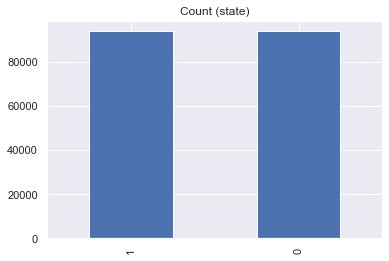

In [8]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.state.value_counts())

df_test_over.state.value_counts().plot(kind='bar', title='Count (state)');

##### iI) Random under-sampling

Random under-sampling:
1    55714
0    55714
Name: state, dtype: int64


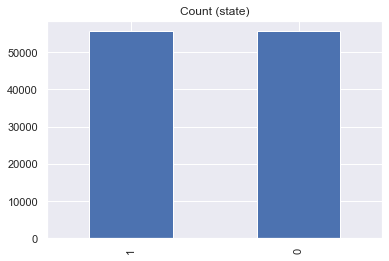

In [9]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
df_test_under['state'].value_counts()
print('Random under-sampling:')
print(df_test_under.state.value_counts())

df_test_under.state.value_counts().plot(kind='bar', title='Count (state)')

## c) Classification (Original data, Oversampled data, Undersampled data)

The following lines will include classification algorithms using 3 types of data: the original data with outliers removed, oversampled data, and undersampled data.

### i) NAIVE BAYES
##### original data

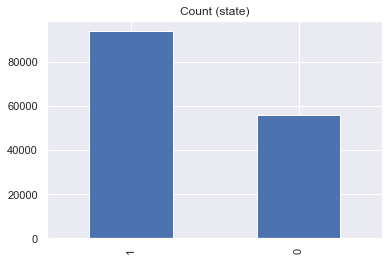

In [10]:
cleaned2_df_w_outliers.state.value_counts().plot(kind='bar', title='Count (state)');

In [17]:
#use 3500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(corpus_df_w_outliers['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(149562, 3500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
#create dependent variable with 'state' column
y = cleaned2_df_w_outliers.iloc[:, 20].values
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Confusion matrix:
 [[ 9505  4489]
 [ 8435 14962]]


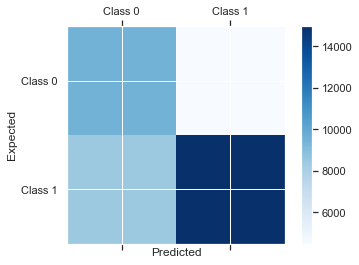

In [19]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [22]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 65.44%
 Precision: 76.92%
    Recall: 63.95%
  F1 score: 69.84%
 ROC score: 65.94%


##### over-sampled data

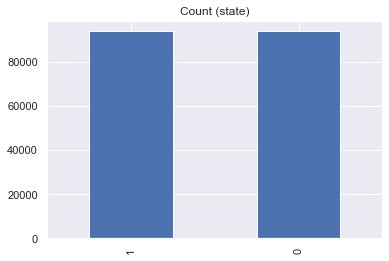

In [14]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [15]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_over_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(187696, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
#create dependent variable with 'state' column
y = df2_test_over_df.iloc[:, 20].values

In [17]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

MemoryError: 

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

##### under-sampled data

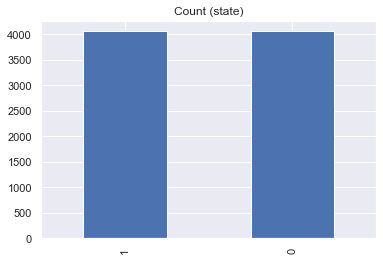

In [100]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [101]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_under_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(8128, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [102]:
#create dependent variable with 'state' column
y = df2_test_under_df.iloc[:, 20].values

In [103]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

array([[700, 329],
       [508, 495]], dtype=int64)

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

### ii) Logistic Regression
##### original data

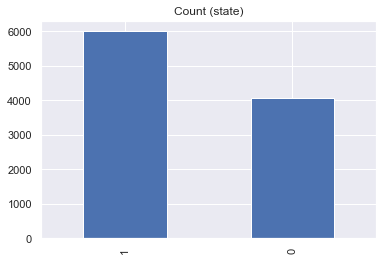

In [126]:
cleaned2_df_w_outliers.state.value_counts().plot(kind='bar', title='Count (state)');

In [127]:
#use 3500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(cleaned2_df_w_outliers['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(10062, 3500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [128]:
#create dependent variable with 'state' column
y = cleaned2_df_w_outliers.iloc[:, 20].values
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

C:\Users\vlad_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[ 455  568]
 [ 395 1098]]


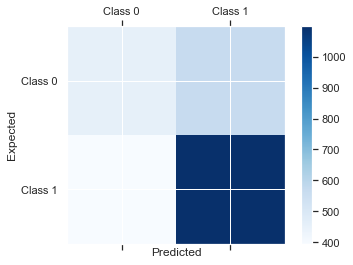

In [129]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting logistic regression to the training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

##### over-sampled data

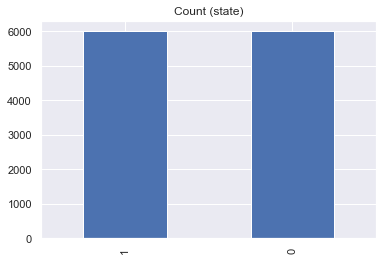

In [130]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [131]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_over_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(11996, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
#create dependent variable with 'state' column
y = df2_test_over_df.iloc[:, 20].values

Confusion matrix:
 [[ 785  699]
 [ 279 1236]]


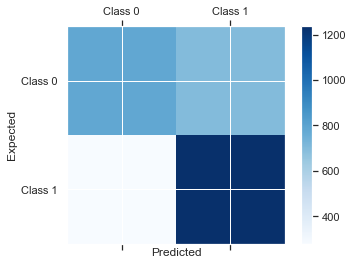

In [133]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

##### under-sampled data

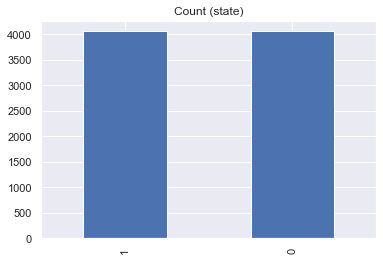

In [134]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [135]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_under_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(8128, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [136]:
#create dependent variable with 'state' column
y = df2_test_under_df.iloc[:, 20].values

Confusion matrix:
 [[700 329]
 [508 495]]


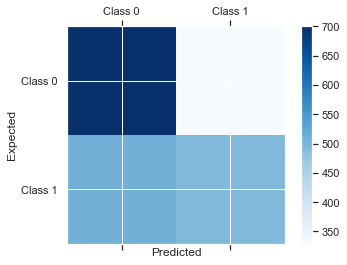

In [137]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [1]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

NameError: name 'accuracy_score' is not defined

### K-Nearest Neighbour
##### original data

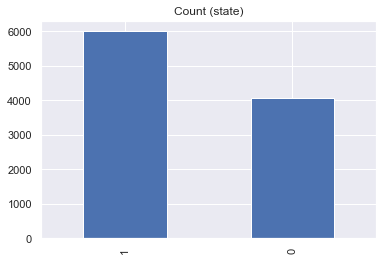

In [146]:
cleaned2_df_w_outliers.state.value_counts().plot(kind='bar', title='Count (state)');

In [147]:
#use 3500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(cleaned2_df_w_outliers['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

MemoryError: 

In [148]:
#create dependent variable with 'state' column
y = cleaned2_df_w_outliers.iloc[:, 20].values
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

##### over-sampled data

In [ ]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [ ]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_over_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

In [ ]:
#create dependent variable with 'state' column
y = df2_test_over_df.iloc[:, 20].values

In [ ]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

##### under-sampled data

In [ ]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [ ]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_under_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

In [ ]:
#create dependent variable with 'state' column
y = df2_test_under_df.iloc[:, 20].values

In [ ]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

### End of Step 7